<a href="https://colab.research.google.com/github/karthikeyanmuthurangam/extensive-vision-ai-program/blob/master/Session3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


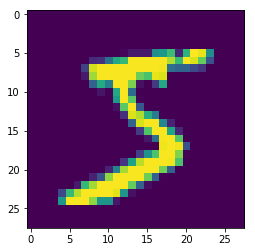

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

dropout = 0.05

# Convolution Block - 1
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1), bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(32, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 1
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Convolution Block - 2
model.add(Convolution2D(16, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 2
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(10, 3, 3))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, use

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9216      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=30, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.7731 - acc: 0.7839
Epoch 2/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.1919 - acc: 0.9445
Epoch 3/30
60000/60000 [==============================] - 5s 84us/step - loss: 0.1250 - acc: 0.9614
Epoch 4/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.1006 - acc: 0.9677
Epoch 5/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0877 - acc: 0.9700
Epoch 6/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0787 - acc: 0.9723
Epoch 7/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0723 - acc: 0.9736
Epoch 8/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.0680 - acc: 0.9755
Epoch 9/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.0630 - acc: 0.9765
Epoch 10/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.0602 - acc: 0.976

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.024331105856140494, 0.9936]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.62644778e-12 6.59827679e-11 6.33864142e-11 2.61789358e-11
  1.05053566e-13 7.33677216e-11 2.66052015e-18 1.00000000e+00
  1.34691769e-12 7.91645152e-11]
 [8.46321927e-05 5.61769484e-05 9.99857426e-01 5.71578425e-07
  1.78295831e-08 1.16625126e-10 3.14143250e-07 1.15485632e-09
  8.78136575e-07 1.13120679e-09]
 [3.00122167e-07 9.99999166e-01 7.34547285e-08 1.50887498e-08
  1.75835751e-07 6.75114791e-08 2.50833079e-08 3.10379171e-08
  2.59185615e-08 2.82917734e-09]
 [9.99995470e-01 2.31367481e-09 2.15140243e-08 3.60981325e-08
  2.37913245e-09 5.19149523e-07 2.64280015e-06 8.64632241e-08
  2.21567671e-08 1.25560950e-06]
 [1.35338346e-11 3.04534424e-08 9.44901934e-09 3.68501367e-12
  9.99997258e-01 4.43618781e-10 4.40907888e-09 4.93659691e-09
  1.98607686e-09 2.71957288e-06]
 [2.37224285e-08 9.99999881e-01 5.81036064e-09 2.24208860e-10
  4.15290735e-08 2.31392772e-09 4.63751570e-09 9.83205410e-08
  6.10558049e-09 2.52904608e-09]
 [3.10264705e-12 5.43244425e-07 1.13488774e-08 1.95458059e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_38'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

print(Y_train[2])
vis_img_in_filter(np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 'conv2d_6')

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


KeyError: ignored